1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import math
from scipy.constants import epsilon_0, e, pi

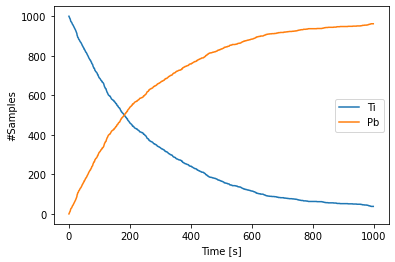

In [16]:
# First Point
samples = 1000
ti = np.ones(samples)
ti_hist = np.array(ti.shape)
pb_hist = np.array([0])
tau = 3.052*60 # half-life
elapsed_time = 1000

decay_prob = 1.-2**(-1/tau)

for t in range(1,elapsed_time):
    cond = [np.random.uniform(size=ti.size)>=decay_prob]
    ti   = np.extract(cond,ti)
    ti_hist = np.append(ti_hist,ti.size)
    pb_hist = np.append(pb_hist,samples - ti.size)


plt.plot(ti_hist,label='Ti')
plt.plot(pb_hist,label='Pb')
plt.legend()

plt.xlabel('Time [s]')
plt.ylabel('#Samples')
plt.show()



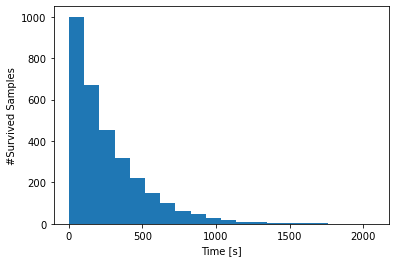

In [17]:
def expon_icdf(p, mu=np.log(2)/tau):
    return -np.log(1-p)/mu

decay_times = expon_icdf(np.random.random(samples))
plt.hist(decay_times,bins=20, cumulative=-1)
plt.xlabel('Time [s]')
plt.ylabel('#Survived Samples')
plt.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [11]:
def get_theta(b):
    Z = 79.
    E = 7.7e6*e
    return 2*np.arctan((Z*e**2)/(np.asarray(2*pi*epsilon_0*E)*b))

def beam(n=1):
    a0 = 5.29177249e-11
    return (np.random.randn(n)*a0/100, np.random.randn(n)*a0/100)

trials = 10**6
particles_that_bounce_back=np.sum((get_theta(beam(trials)) > pi/2).all(axis = 0))/trials
print("fraction of particles that bounce back: ", particles_that_bounce_back)


fraction of particles that bounce back:  0.000498


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

hit or miss integration method result: 1.45214 with an error of: 0.0007399999999999629
mean value integration method result:  1.1936978077181901 with an error of: 0.2577021922818099


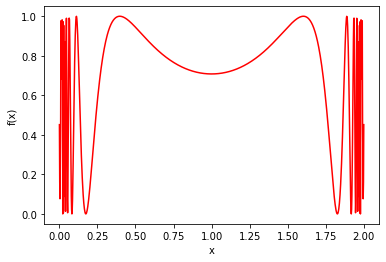

In [8]:
#from using Wolfram, we know that the right value of the integral is 1.4514
def f(x):
    return (np.sin(1/(x*(2-x))))**2

true_value=1.4514
x=np.linspace(0.001,1.999,1000)
plt.plot(x,f(x),'r-')
plt.ylabel('f(x)')
plt.xlabel('x')

#hit-miss method
N=100000
count=0
sum=0
for i in range(N):
    x=2*np.random.random()
    y=np.random.random()
    if y<f(x): 
        count+=1
        sum+=f(x)
hit_or_miss_result=2*count/N
mean_value_result=2*sum/N
error_hit_or_miss = abs(true_value-hit_or_miss_result)
error_mean_value= abs(true_value - mean_value_result)
print('hit or miss integration method result:', hit_or_miss_result, 'with an error of:', error_hit_or_miss)
print('mean value integration method result: ', mean_value_result, 'with an error of:', error_mean_value)



4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [6]:
#2d
counter=0
n=1000000
for i in range(n):
    x = np.random.random()
    y = np.random.random()
    if x**2 + y**2 < 1:
        counter += 1
integral_circle = counter/n*4
print('integral of circle: ', integral_circle)

#10d
counter=0
for i in range(n):
    x = np.random.rand(10)
    r=(x**2).sum()
    if r<1:
        counter += 1
hyper_circle = counter/n*2**10
print('integral of 10d hypersurface: ', hyper_circle)



 


integral of circle:  3.14342
integral of 10d hypersurface:  2.501632


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [2]:
def w(x):
    return x**(-0.5)
def f(x): 
    return x**(-0.5)/(np.exp(x)+1)

n=10000
s = 0

for i in range(n):
    x=np.random.rand()
    s+=2*f(x)/w(x)
    
result_integral = s/n

print("Importance Sampling =", result_integral)



Importance Sampling = 0.7628059998719862
